# MALARIA IN AFRICA (2007-2017)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Control display of seaborn data 
pd.options.display.max_columns=50
sns.set(style="darkgrid", rc={"axes.facecolor":"#CAF1DE"})

**DATASET BEFORE CLEANING.**

In [2]:
# Loading the dataset
df = pd.read_csv(r'..\..\resources\datasets\MalariaAfricaDataset.csv')
df

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.24,19.96,17.33,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,NaN,NaN,NaN,NaN,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,83.96,NaN,NaN,NaN,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,NaN,NaN,NaN,NaN,58.84,1.58,41.16,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,NaN,78.12,NaN,88.29,31.36,0.20,68.64,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,15.70,NaN,NaN,NaN,76.80,3.01,23.20,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,46.25,NaN,NaN,NaN,57.02,2.01,42.98,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


**ANALYZING THE DATASET.**

In [3]:
# Checking shape of data (rows, columns)
#getting shape of data (rows, columns
df.shape

(594, 27)

In [4]:
# Checking column names
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban  (% of urban population)',
       'Rural population (% of total population)',
       'Rural popula

In [5]:
updated_columns = {
    'Incidence of malaria (per 1,000 population at risk)': 'Malaria_Incidence_per1000_at-risk',
    'Use of insecticide-treated bed nets (% of under-5 population)': 'Use_of_treated_bed_nets(% under 5)',
    'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)': 'Children_with_fever_receiving_antimalarial_drugs(% under 5)',
    'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)': 'Preventive_treatmnet_in_pregnancy(% pregnant women)',
    'People using safely managed drinking water services (% of population)': 'People_using_safely_managed_drinking_water(% Total)',
    'People using safely managed drinking water services, rural (% of rural population)': 'People_using_safely_managed_drinking_water(% Rural)',
    'People using safely managed drinking water services, urban (% of urban population)': 'People_using_safely_managed_drinking_water(% Urban)',
    'People using safely managed sanitation services (% of population)': 'People_using_safely_managed_sanitation(% Total)',
    'People using safely managed sanitation services, rural (% of rural population)': 'People_using_safely_managed_sanitation(% Rural)',
    'People using safely managed sanitation services, urban  (% of urban population)': 'People_using_safely_managed_sanitation(% Urban)',
    'People using at least basic drinking water services (% of population)': 'People_using_basic_drinking_water(% Total)',
    'People using at least basic drinking water services, rural (% of rural population)': 'People_using_basic_drinking_water(% Rural)',
    'People using at least basic drinking water services, urban (% of urban population)': 'People_using_basic_drinking_water(% Urban)',
    'People using at least basic sanitation services (% of population)': 'People_using_basic_sanitation(% Total)',
    'People using at least basic sanitation services, rural (% of rural population)': 'People_using_basic_sanitaion(% Rural)',
    'People using at least basic sanitation services, urban  (% of urban population)': 'People_using_basic_sanitation(% Urban)',
}

# Rename the columns
df.rename(columns=updated_columns, inplace=True)

In [6]:
# Modified column names
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Malaria_Incidence_per1000_at-risk', 'Malaria cases reported',
       'Use_of_treated_bed_nets(% under 5)',
       'Children_with_fever_receiving_antimalarial_drugs(% under 5)',
       'Preventive_treatmnet_in_pregnancy(% pregnant women)',
       'People_using_safely_managed_drinking_water(% Total)',
       'People_using_safely_managed_drinking_water(% Rural)',
       'People_using_safely_managed_drinking_water(% Urban)',
       'People_using_safely_managed_sanitation(% Total)',
       'People_using_safely_managed_sanitation(% Rural)',
       'People_using_safely_managed_sanitation(% Urban)',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People_using_basic_drinking_water(% Total)',
       'People_using_basic_drinking_water(% Rural)',
       'People_using_basic_drinking_water(% Urba

In [7]:
# Checking data types
df.dtypes

Country Name                                                    object
Year                                                             int64
Country Code                                                    object
Malaria_Incidence_per1000_at-risk                              float64
Malaria cases reported                                         float64
Use_of_treated_bed_nets(% under 5)                             float64
Children_with_fever_receiving_antimalarial_drugs(% under 5)    float64
Preventive_treatmnet_in_pregnancy(% pregnant women)            float64
People_using_safely_managed_drinking_water(% Total)            float64
People_using_safely_managed_drinking_water(% Rural)            float64
People_using_safely_managed_drinking_water(% Urban)            float64
People_using_safely_managed_sanitation(% Total)                float64
People_using_safely_managed_sanitation(% Rural)                float64
People_using_safely_managed_sanitation(% Urban)                float64
Rural 

In [8]:
# Checking for basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 27 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Country Name                                                 594 non-null    object 
 1   Year                                                         594 non-null    int64  
 2   Country Code                                                 594 non-null    object 
 3   Malaria_Incidence_per1000_at-risk                            550 non-null    float64
 4   Malaria cases reported                                       550 non-null    float64
 5   Use_of_treated_bed_nets(% under 5)                           132 non-null    float64
 6   Children_with_fever_receiving_antimalarial_drugs(% under 5)  122 non-null    float64
 7   Preventive_treatmnet_in_pregnancy(% pregnant women)          106 non-null    flo

In [9]:
# Check null values
df.isnull().sum().sort_values(ascending = False)

People_using_safely_managed_drinking_water(% Rural)            506
People_using_safely_managed_drinking_water(% Total)            495
Preventive_treatmnet_in_pregnancy(% pregnant women)            488
People_using_safely_managed_sanitation(% Rural)                484
Children_with_fever_receiving_antimalarial_drugs(% under 5)    472
People_using_safely_managed_sanitation(% Urban)                462
People_using_safely_managed_sanitation(% Total)                462
Use_of_treated_bed_nets(% under 5)                             462
People_using_safely_managed_drinking_water(% Urban)            418
Malaria cases reported                                          44
Malaria_Incidence_per1000_at-risk                               44
People_using_basic_sanitation(% Urban)                          28
People_using_basic_drinking_water(% Rural)                      28
People_using_basic_drinking_water(% Urban)                      28
People_using_basic_sanitaion(% Rural)                         

In [10]:
# Check if there are any duplicates
df.duplicated().sum()

0

In [11]:
""" 
I filled both the malaria cases reported and incidence of malaria columns with 0s because the two columns each has 44 nulls , 
since each country appears 11 times, there are 4 countries with nulls throughout the 11 years. Therefore I couldn't calculate the mean.
Alos I could not just assume any value to be filled in all the 11 spaces for each country. 
"""
df['Malaria cases reported'].fillna(0, inplace=True)
df['Malaria_Incidence_per1000_at-risk'].fillna(0, inplace=True)

**Confirmation that the two columns now have no nulls.**

In [12]:
df['Malaria cases reported'].isnull().sum()

0

In [13]:
df['Malaria_Incidence_per1000_at-risk'].isnull().sum()

0

**Handling nulls by filling the missing values with the mean of the rows that have data for each particular country.**

In [14]:
eritrea_means = df.loc[df['Country Name'] == 'Eritrea', ['Rural population growth (annual %)', 'Urban population (% of total population)', 'Rural population (% of total population)','Urban population growth (annual %)','People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)']].mean()

# Filter out the rows that have data
eritrea_data_rows = df.loc[df['Country Name'] == 'Eritrea'].dropna(subset=['Rural population growth (annual %)', 'Urban population (% of total population)', 'Rural population (% of total population)','Urban population growth (annual %)','People_using_basic_drinking_water(% Total)','People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)'])

# Fill the rows that don't have data with the mean values
df.loc[df['Country Name'] == 'Eritrea', ['Rural population growth (annual %)', 'Urban population (% of total population)','Rural population (% of total population)', 'Urban population growth (annual %)',
                                                'People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)']] = df.loc[
    df['Country Name'] == 'Eritrea', ['Rural population growth (annual %)', 'Urban population (% of total population)', 'Rural population (% of total population)','Urban population growth (annual %)',
                                                'People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)']
].fillna(eritrea_means)

In [15]:
sudan_means = df.loc[df['Country Name'] == 'South Sudan', ['People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)']].mean()

# Filter out the rows that have data
sudan_data_rows = df.loc[df['Country Name'] == 'South Sudan'].dropna(subset=['People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)'])

# Fill the rows that don't have data with the mean values
df.loc[df['Country Name'] == 'South Sudan', ['People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitaion(% Urban)']] = df.loc[
    df['Country Name'] == 'South Sudan', ['People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)']
].fillna(sudan_means)

In [16]:
car_means = df.loc[df['Country Name'] == 'Central African Republic', ['People_using_basic_drinking_water(% Total)', 
                                                'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)']].mean()

# Filter out the rows that have data
car_data_rows = df.loc[df['Country Name'] == 'Central African Republic'].dropna(subset=['People_using_basic_drinking_water(% Total)', 
                                                'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)'])

# Fill the rows that don't have data with the mean values
df.loc[df['Country Name'] == 'Central African Republic', ['People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)']] = df.loc[
    df['Country Name'] == 'Central African Republic', ['People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)']
].fillna(car_means)

I filled the remaining nulls available with zero because the columns still having nulls have over 75% of the data with nulls.
Calculating mean like the code earlier would give nulls, since for some particular countries, all the 11 times they appear have nulls.

In [17]:
# Replace NaN with zero
df.fillna(0, inplace=True)

**Confirmation that all columns now have no nulls.**

In [18]:
df.isnull().sum().sort_values(ascending = False) 

Country Name                                                   0
Year                                                           0
geometry                                                       0
longitude                                                      0
latitude                                                       0
People_using_basic_sanitation(% Urban)                         0
People_using_basic_sanitaion(% Rural)                          0
People_using_basic_sanitation(% Total)                         0
People_using_basic_drinking_water(% Urban)                     0
People_using_basic_drinking_water(% Rural)                     0
People_using_basic_drinking_water(% Total)                     0
Urban population growth (annual %)                             0
Urban population (% of total population)                       0
Rural population growth (annual %)                             0
Rural population (% of total population)                       0
People_using_safely_manag

In [19]:
df.dtypes

Country Name                                                    object
Year                                                             int64
Country Code                                                    object
Malaria_Incidence_per1000_at-risk                              float64
Malaria cases reported                                         float64
Use_of_treated_bed_nets(% under 5)                             float64
Children_with_fever_receiving_antimalarial_drugs(% under 5)    float64
Preventive_treatmnet_in_pregnancy(% pregnant women)            float64
People_using_safely_managed_drinking_water(% Total)            float64
People_using_safely_managed_drinking_water(% Rural)            float64
People_using_safely_managed_drinking_water(% Urban)            float64
People_using_safely_managed_sanitation(% Total)                float64
People_using_safely_managed_sanitation(% Rural)                float64
People_using_safely_managed_sanitation(% Urban)                float64
Rural 

**Handling wrong data in the Country column.**

In [20]:
# Remove "The" from 'Country Gambia'
df['Country Name'] = df['Country Name'].str.replace(', The', '').str.strip()

**Changing the data type of the malaria cases reported to int.**

In [21]:
df['Malaria cases reported'] = df['Malaria cases reported'].astype('int')

**ANALYZING THE CORRELATION BETWEEN THE COLUMNS.**

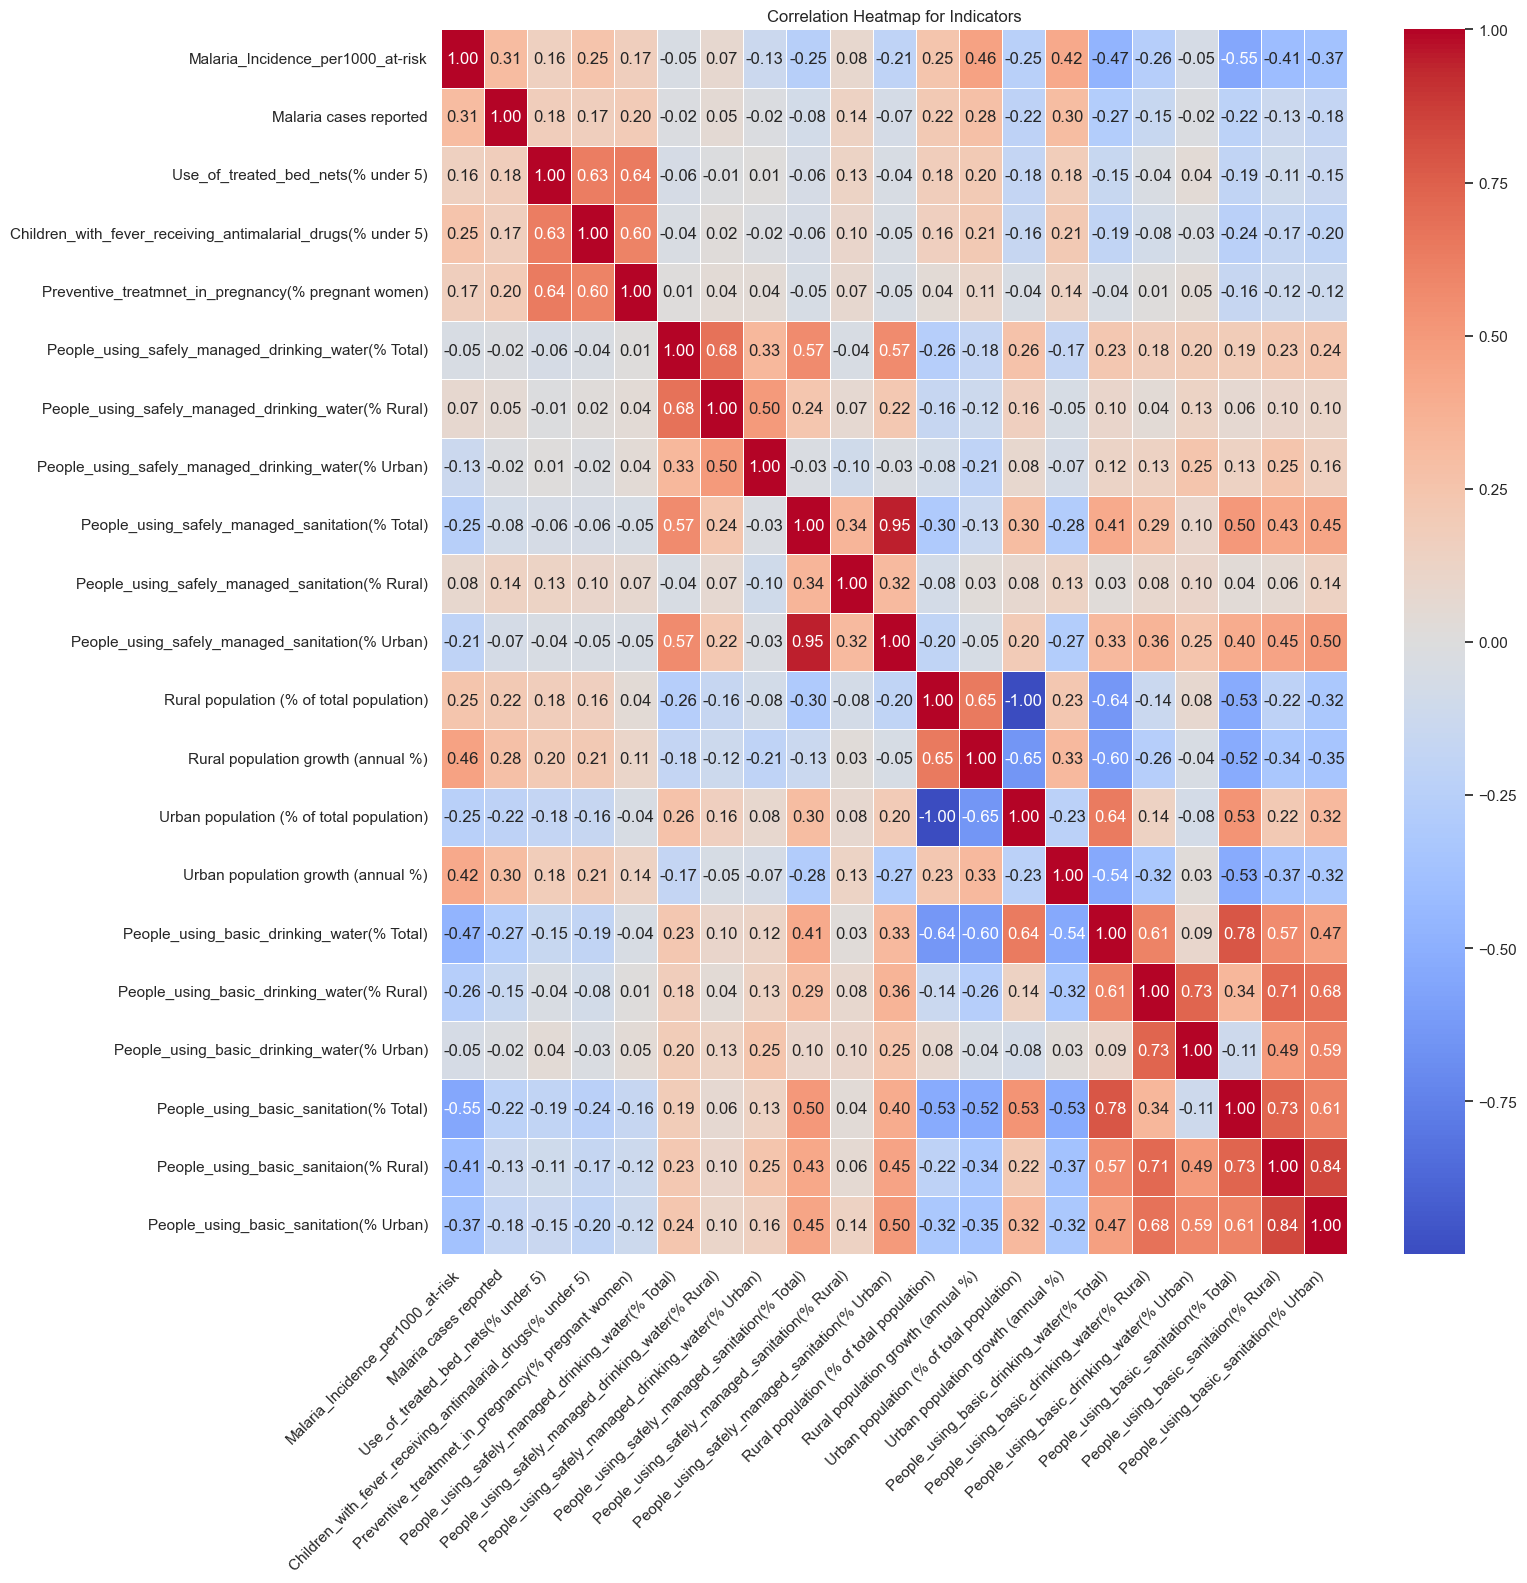

In [22]:
# Filter only the necessary columns
heatmap_data = df.iloc[:, 3:24]

# Compute the correlation matrix
correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Indicators')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Analyze the reported number of malaria cases to understand the burden of malaria in different countries and over time.**

In [23]:
# Filter out Year and Malaria cases reported.
malaria_cases = df[['Year', 'Malaria cases reported']]
malaria_cases

,Year,Malaria cases reported
0,2007,26
1,2007,1533485
2,2007,0
3,2007,390
4,2007,44246
...,...,...
589,2017,1755577
590,2017,0
591,2017,11667831
592,2017,5505639


In [24]:
# Get total malaria cases per year and highlighting a year with maximum total cases.
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if cell else '' for cell in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: maroon' if cell else '' for cell in is_min]

totalmalaria_cases = malaria_cases.groupby('Year').sum()

totalmalaria_cases.style.apply(highlight_max)

,Malaria cases reported
Year,
2007,10102341
2008,9508374
2009,14414616
2010,22184760
2011,23002865
2012,39719221
2013,47174959
2014,77028814
2015,92968526


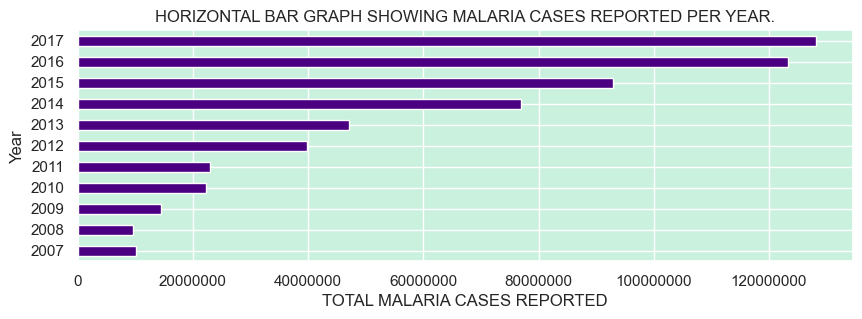

In [25]:
malaria_cases_bar = totalmalaria_cases.plot(kind='barh', align='center', figsize=(10,3), color='indigo', legend =False,
                            title="HORIZONTAL BAR GRAPH SHOWING MALARIA CASES REPORTED PER YEAR.")
# Remove scientific notation from x-axis
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('TOTAL MALARIA CASES REPORTED')
plt.show()

**FURTHER ANALYSIS ON YEAR 2017.**

We chose 2017 because it has the highest number of malaria cases reported so it is good for analysis. It can also be used to predict what the values for the next year 2018 will be.

In [26]:
yearGroups = df.groupby(['Year'])

year2016 = yearGroups.get_group(2016)
year2016.reset_index(drop=True, inplace=True)

year2017 = yearGroups.get_group(2017)
year2017.reset_index(drop=True, inplace=True)
year2017.head()

,Country Name,Year,Country Code,Malaria_Incidence_per1000_at-risk,Malaria cases reported,Use_of_treated_bed_nets(% under 5),Children_with_fever_receiving_antimalarial_drugs(% under 5),Preventive_treatmnet_in_pregnancy(% pregnant women),People_using_safely_managed_drinking_water(% Total),People_using_safely_managed_drinking_water(% Rural),People_using_safely_managed_drinking_water(% Urban),People_using_safely_managed_sanitation(% Total),People_using_safely_managed_sanitation(% Rural),People_using_safely_managed_sanitation(% Urban),Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People_using_basic_drinking_water(% Total),People_using_basic_drinking_water(% Rural),People_using_basic_drinking_water(% Urban),People_using_basic_sanitation(% Total),People_using_basic_sanitaion(% Rural),People_using_basic_sanitation(% Urban),latitude,longitude,geometry,People_using_basic_sanitaion(% Urban)
0,Algeria,2017,DZA,0.00,0,0.0,0.0,0.0,0.0,0.0,0.00,17.69,20.79,16.48,27.95,-0.05,72.05,2.87,93.56,88.69,95.44,87.59,82.21,89.67,28.033886,1.659626,POINT (28.033886 1.659626),0.0
1,Angola,2017,AGO,228.91,3874892,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,35.16,1.38,64.84,4.39,55.84,27.44,71.24,49.88,23.23,64.33,-11.202692,17.873887,POINT (-11.202692 17.873887),0.0
2,Benin,2017,BEN,399.56,1774022,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,53.23,1.74,46.77,3.91,66.41,58.22,75.75,16.45,7.62,26.51,9.307690,2.315834,POINT (9.307689999999999 2.315834),0.0
3,Botswana,2017,BWA,2.05,1900,0.0,0.0,0.0,0.0,0.0,83.22,0.00,0.00,0.00,31.30,-0.35,68.70,3.19,90.34,75.53,97.09,77.27,50.60,89.42,-22.328474,24.684866,POINT (-22.328474 24.684866),0.0
4,Burkina Faso,2017,BFA,399.94,10255415,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,71.26,2.04,28.74,5.03,47.89,34.99,79.86,19.40,11.34,39.38,12.238333,-1.561593,POINT (12.238333 -1.561593),0.0


In [27]:
# Filter out the malaria cases repoted per country in 2017.
cases2017 = year2017[['Country Name', 'Malaria cases reported']].sort_values(by='Malaria cases reported',ascending=False)
cases2017.head(10)

,Country Name,Malaria cases reported
11,"Congo, Dem. Rep.",16793002
51,Uganda,11667831
38,Nigeria,11639713
4,Burkina Faso,10255415
35,Mozambique,9892601
5,Burundi,8453810
22,Ghana,5584185
52,Zambia,5505639
48,Tanzania,5354819
30,Malawi,4901344


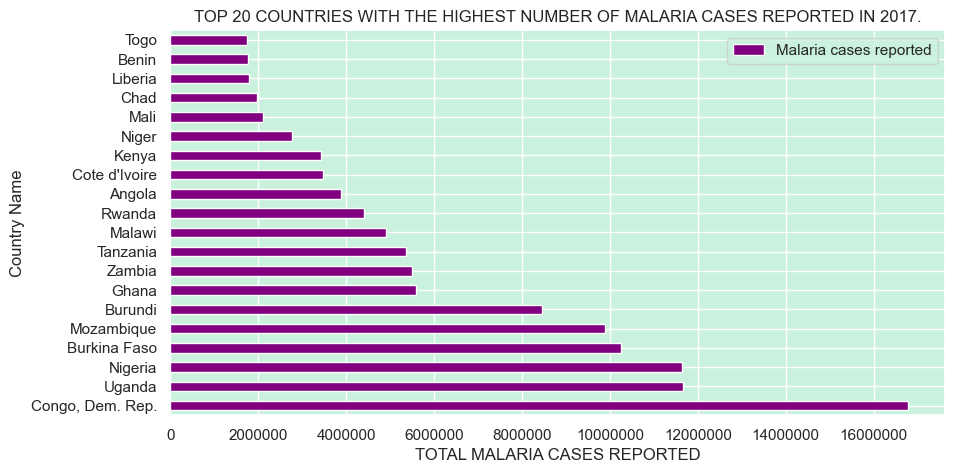

In [28]:
# Plotting top 20 countries with the highest number of malaria cases reported. (year2017)
# These countries form a basis of the countries that need aid from the health organizations.

cases2017.head(20).plot(kind='barh', x='Country Name', y='Malaria cases reported', align='center', color='purple', figsize=(10,5), 
                        title='TOP 20 COUNTRIES WITH THE HIGHEST NUMBER OF MALARIA CASES REPORTED IN 2017.')
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('TOTAL MALARIA CASES REPORTED')
plt.show()

In [29]:
# Filter out the malaria cases repoted per country in 2016.
cases2016 = year2016[['Country Name', 'Malaria cases reported']].sort_values(by='Malaria cases reported',ascending=False)
cases2016.head(10)

,Country Name,Malaria cases reported
11,"Congo, Dem. Rep.",16821130
38,Nigeria,12293820
4,Burkina Faso,9779411
35,Mozambique,9690873
51,Uganda,9385132
5,Burundi,8793176
48,Tanzania,5188863
52,Zambia,4851319
30,Malawi,4827373
39,Rwanda,4725577


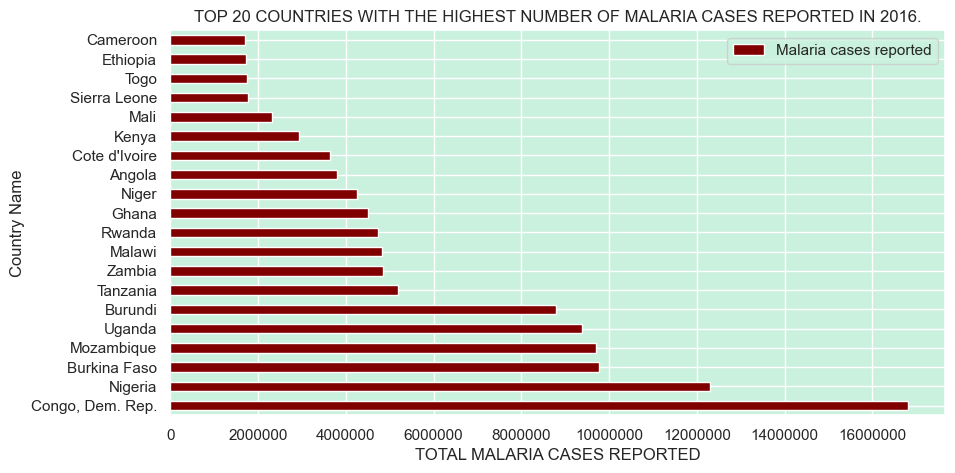

In [30]:
# Plotting top 20 countries with the highest number of malaria cases reported. (year2016)
# These countries form a basis of the countries that need aid from the health organizations.

cases2016.head(20).plot(kind='barh', x='Country Name', y='Malaria cases reported', align='center', color='maroon', figsize=(10,5), 
                        title='TOP 20 COUNTRIES WITH THE HIGHEST NUMBER OF MALARIA CASES REPORTED IN 2016.')
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('TOTAL MALARIA CASES REPORTED')
plt.show()

In [31]:
""" 
Analysis of the top 20 countries with the highest number of malaria cases reported in 2017 and 2016 shows that:
    Congo has the highest number of malaria cases reported in both 2016 and 2017.
    There is a significant increase in the number of cases in Uganda in 2017 as compared to 2016.
    Cases in Mozambique, Burkina Faso and Nigeria are almost constant, so there is need for intervention. 
""" 

' \nAnalysis of the top 20 countries with the highest number of malaria cases reported in 2017 and 2016 shows that:\n    Congo has the highest number of malaria cases reported in both 2016 and 2017.\n    There is a significant increase in the number of cases in Uganda in 2017 as compared to 2016.\n    Cases in Mozambique, Burkina Faso and Nigeria are almost constant, so there is need for intervention. \n'

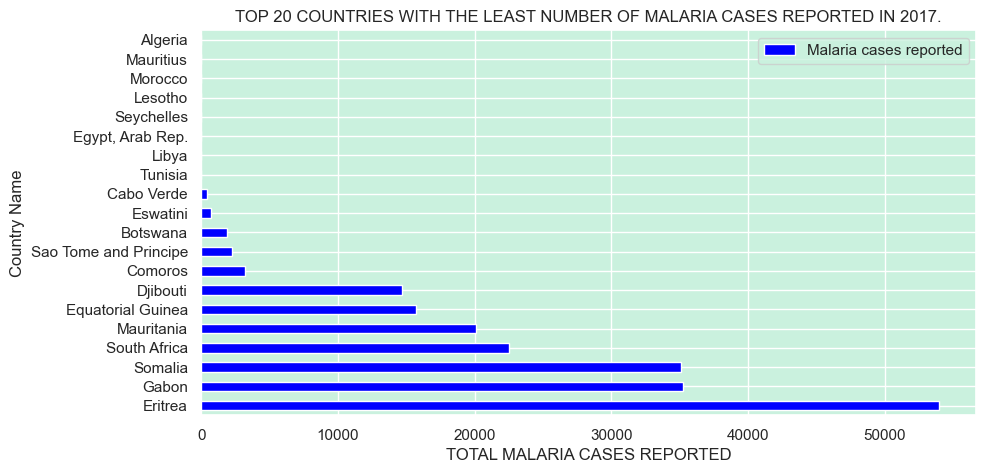

In [32]:
# Plotting top 20 countries with the least number of malaria cases reported. (year2017)
# These countries can be used as a bench mark and highly affected countries can ask for advice from them about how they are able to control the disease.

cases2017.tail(20).plot(kind='barh', x='Country Name', y='Malaria cases reported', align='center', color='BLUE', figsize=(10,5), 
                        title='TOP 20 COUNTRIES WITH THE LEAST NUMBER OF MALARIA CASES REPORTED IN 2017.')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('TOTAL MALARIA CASES REPORTED')
plt.show()

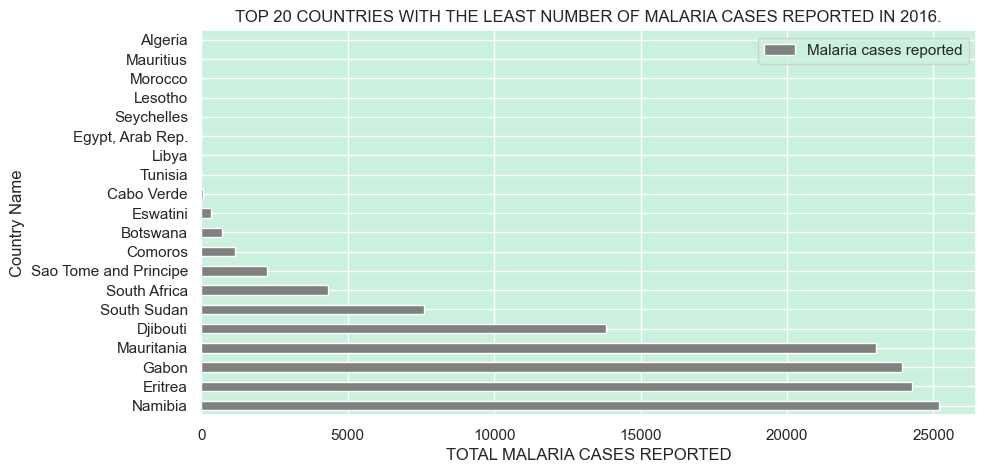

In [33]:
# Plotting top 20 countries with the least number of malaria cases reported. (year2016)
# These countries can be used as a bench mark and highly affected countries can ask for advice from them about how they are able to control the disease.

cases2016.tail(20).plot(kind='barh', x='Country Name', y='Malaria cases reported', align='center', color='grey', figsize=(10,5), 
                        title='TOP 20 COUNTRIES WITH THE LEAST NUMBER OF MALARIA CASES REPORTED IN 2016.')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('TOTAL MALARIA CASES REPORTED')
plt.show()

In [34]:
""" 
Analysis of the top 20 countries with the least number of malaria cases reported in 2017 and 2016 shows that:
    There is a significant increase in the number of cases reported in Eritrea with the cases doubling.
    There is need to handle cases in Gabon, Mauritania and Djibouti with cases almost remaining constant. 
""" 

' \nAnalysis of the top 20 countries with the least number of malaria cases reported in 2017 and 2016 shows that:\n    There is a significant increase in the number of cases reported in Eritrea with the cases doubling.\n    There is need to handle cases in Gabon, Mauritania and Djibouti with cases almost remaining constant. \n'

**Explore the trends and patterns of malaria incidence by identifying countries with high and low malaria incidence rates.**

In [35]:
# Filter out the number of people at risk of getting malaria per country in 2017.
at_risk = year2017[['Country Name', 'Malaria_Incidence_per1000_at-risk']]
at_risk.head()

,Country Name,Malaria_Incidence_per1000_at-risk
0,Algeria,0.00
1,Angola,228.91
2,Benin,399.56
3,Botswana,2.05
4,Burkina Faso,399.94


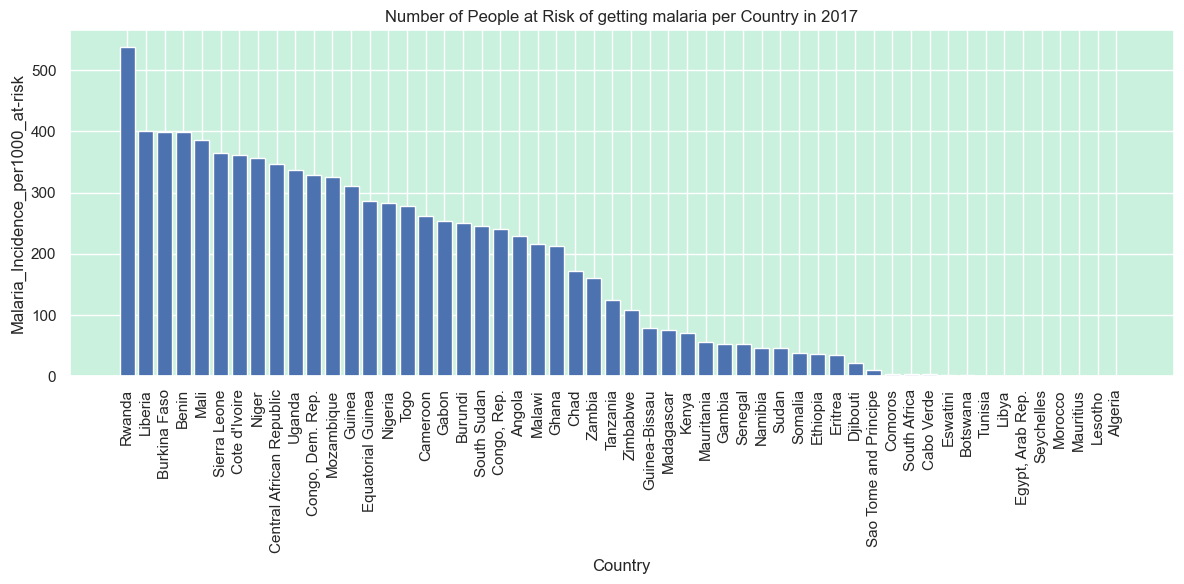

In [36]:
plt.figure(figsize=(12, 6))  

# Sorting the data by incidence in descending order to get a more informative plot
at_risk_sorted = at_risk.sort_values(by='Malaria_Incidence_per1000_at-risk', ascending=False)

plt.bar(at_risk_sorted['Country Name'], at_risk_sorted['Malaria_Incidence_per1000_at-risk'])
plt.xticks(rotation=90)  

plt.xlabel('Country')
plt.ylabel('Malaria_Incidence_per1000_at-risk')
plt.title('Number of People at Risk of getting malaria per Country in 2017')
plt.tight_layout()

plt.show()

## Plotting Incidences of Malaria with occured per year

In [62]:
# Identifying years where Malaria incidences where many
year_incidences = ['Malaria_Incidence_per1000_at-risk', 'Year','Country Name']
filtered_df = df[year_incidences]
print(filtered_df)

     Malaria_Incidence_per1000_at-risk  Year  Country Name
0                                 0.01  2007       Algeria
1                               286.72  2007        Angola
2                               480.24  2007         Benin
3                                 1.03  2007      Botswana
4                               503.80  2007  Burkina Faso
..                                 ...   ...           ...
589                             278.20  2017          Togo
590                               0.00  2017       Tunisia
591                             336.76  2017        Uganda
592                             160.05  2017        Zambia
593                             108.55  2017      Zimbabwe

[594 rows x 3 columns]


In [63]:
#  Group by year and count the number of Malaria Incidences for each year
yearly_incidence_count = df.groupby('Year')['Malaria_Incidence_per1000_at-risk'].sum().reset_index()

# Print the yearly Incidence count
print(yearly_incidence_count)

    Year  Malaria_Incidence_per1000_at-risk
0   2007                           10508.39
1   2008                           10212.69
2   2009                           10139.55
3   2010                            9953.84
4   2011                            9583.18
5   2012                            9460.27
6   2013                            9256.11
7   2014                            8836.92
8   2015                            8837.11
9   2016                            8944.24
10  2017                            8815.82


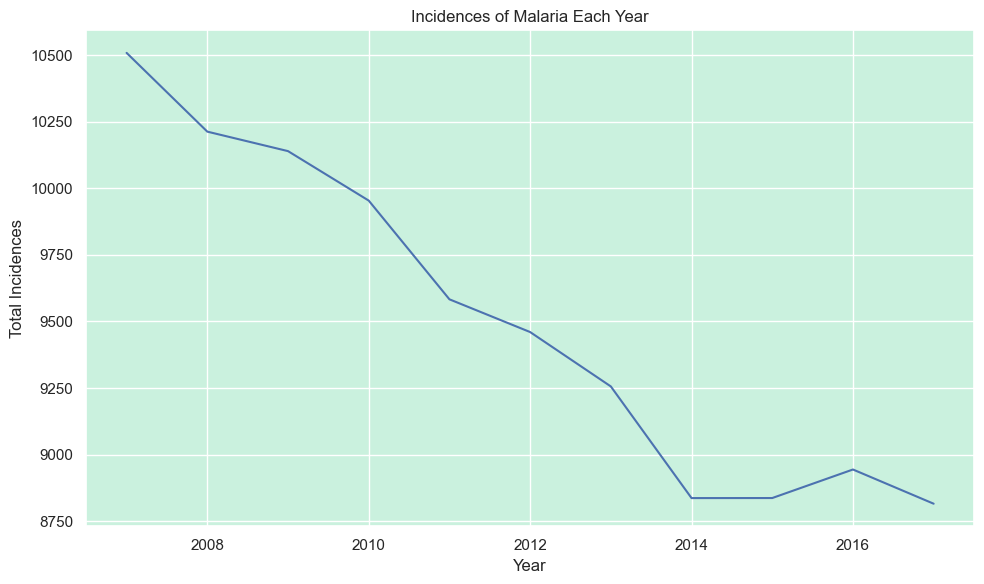

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

sns.lineplot(y='Malaria_Incidence_per1000_at-risk',x='Year',data=yearly_incidence_count)
# Set the title and labels
plt.title('Incidences of Malaria Each Year')
plt.xlabel('Year')
plt.ylabel('Total Incidences')

# Show the plot
plt.tight_layout()
plt.show()

**Analyzing malaria incidence in East African countries.**

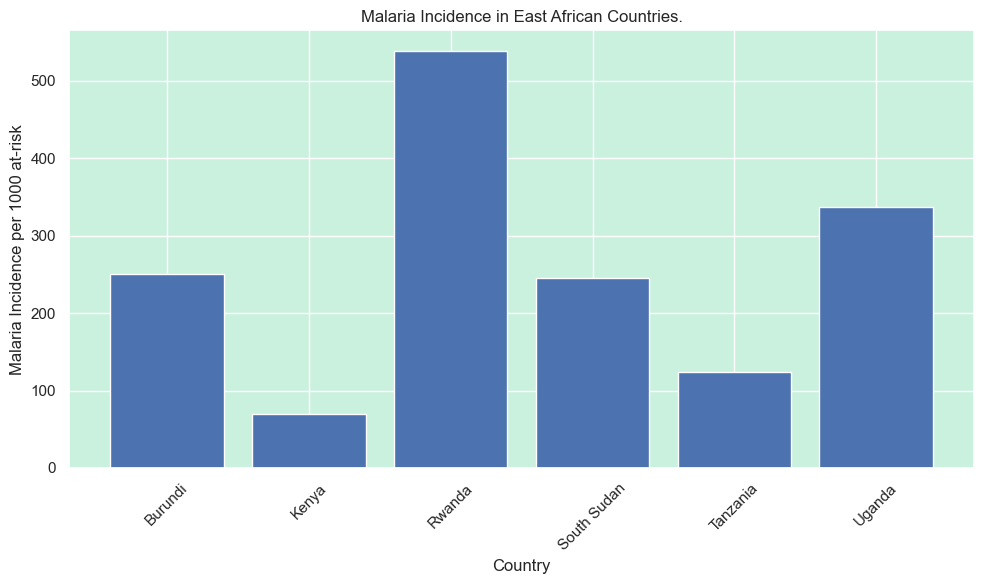

In [37]:
east_african_countries = ['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi', 'South Sudan']
east_african_at_risk = at_risk[at_risk['Country Name'].isin(east_african_countries)]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(east_african_at_risk['Country Name'], east_african_at_risk['Malaria_Incidence_per1000_at-risk'])
plt.xlabel('Country')
plt.ylabel('Malaria Incidence per 1000 at-risk')
plt.title('Malaria Incidence in East African Countries.')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analyzing malaria incidence in South African countries.**

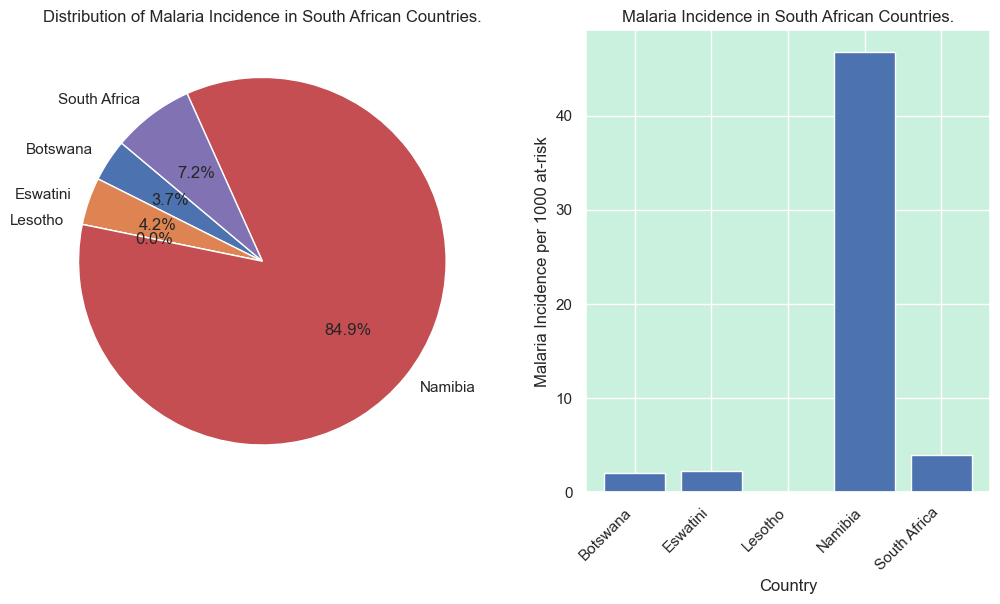

In [38]:
south_african_countries = ['South Africa', 'Namibia', 'Botswana', 'Lesotho', 'Eswatini']

south_african_at_risk = at_risk[at_risk['Country Name'].isin(south_african_countries)]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart on the left subplot
ax1.pie(south_african_at_risk['Malaria_Incidence_per1000_at-risk'], labels=south_african_at_risk['Country Name'], autopct='%1.1f%%', startangle=140)
ax1.set_title('Distribution of Malaria Incidence in South African Countries.')
ax1.axis('equal')

# Plot the bar chart on the right subplot
ax2.bar(south_african_at_risk['Country Name'], south_african_at_risk['Malaria_Incidence_per1000_at-risk'])
ax2.set_xlabel('Country')
ax2.set_ylabel('Malaria Incidence per 1000 at-risk')
ax2.set_title('Malaria Incidence in South African Countries.')
ax2.set_xticks(range(len(south_african_at_risk)))
ax2.set_xticklabels(south_african_at_risk['Country Name'], rotation=45, ha='right')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

**Analyzing malaria incidence in West African countries.**

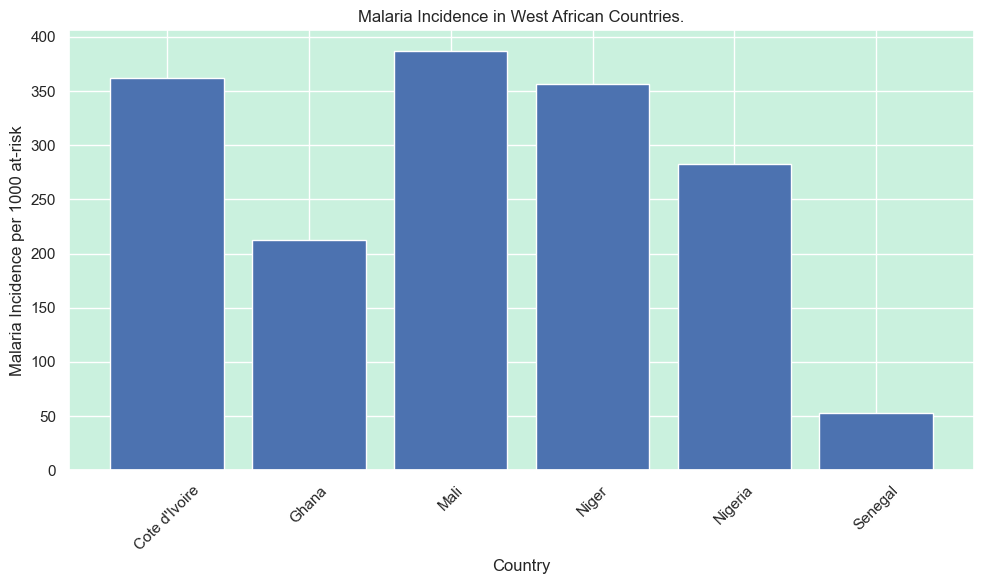

In [39]:
west_african_countries = ['Nigeria', 'Ghana', 'Senegal', 'Cote d\'Ivoire', 'Mali', 'Niger']
west_african_at_risk = at_risk[at_risk['Country Name'].isin(west_african_countries)]

plt.figure(figsize=(10, 6))
plt.bar(west_african_at_risk['Country Name'], west_african_at_risk['Malaria_Incidence_per1000_at-risk'])
plt.xlabel('Country')
plt.ylabel('Malaria Incidence per 1000 at-risk')
plt.title('Malaria Incidence in West African Countries.')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analyzing Infrastructure for healthcare and disease prevention.**

In [40]:
# Filter out percentage of people using atleast basic sanitation services.
sanitation = year2017[['Country Name', 'People_using_basic_sanitation(% Total)']]
sorted_sanitation = sanitation.sort_values(by='People_using_basic_sanitation(% Total)')
sorted_sanitation.head(15)

,Country Name,People_using_basic_sanitation(% Total)
19,Ethiopia,7.320
9,Chad,8.340
29,Madagascar,10.510
46,South Sudan,11.320
17,Eritrea,11.368
37,Niger,13.570
43,Sierra Leone,15.650
49,Togo,16.130
2,Benin,16.450
27,Liberia,16.970


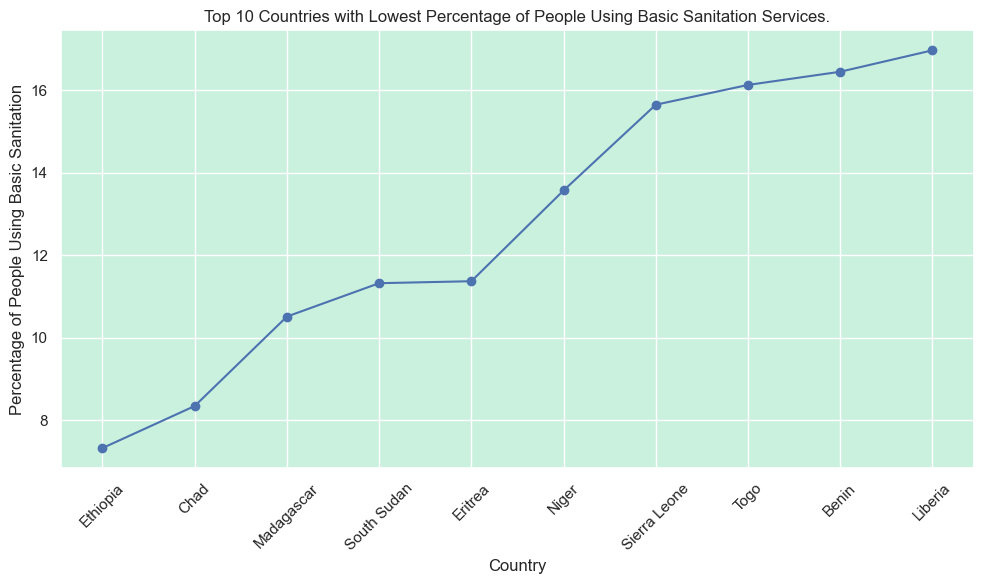

In [41]:
# Visualize the top 10 countries with inadequate sanitation facilities
top_10 = sorted_sanitation.head(10)

plt.figure(figsize=(10, 6))
plt.plot(top_10['Country Name'], top_10['People_using_basic_sanitation(% Total)'], marker='o')

plt.title('Top 10 Countries with Lowest Percentage of People Using Basic Sanitation Services.')
plt.xlabel('Country')
plt.ylabel('Percentage of People Using Basic Sanitation')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

In [42]:
# Filter out percentage of people using atleast basic drinking water services.
drinking_water = year2017[['Country Name', 'People_using_basic_drinking_water(% Total)']]
sorted_drinking_water = drinking_water.sort_values(by='People_using_basic_drinking_water(% Total)')
sorted_drinking_water.head(15)

,Country Name,People_using_basic_drinking_water(% Total)
9,Chad,38.700
46,South Sudan,40.680
19,Ethiopia,41.060
11,"Congo, Dem. Rep.",43.240
8,Central African Republic,47.588
4,Burkina Faso,47.890
51,Uganda,49.100
37,Niger,50.270
17,Eritrea,50.428
44,Somalia,52.440


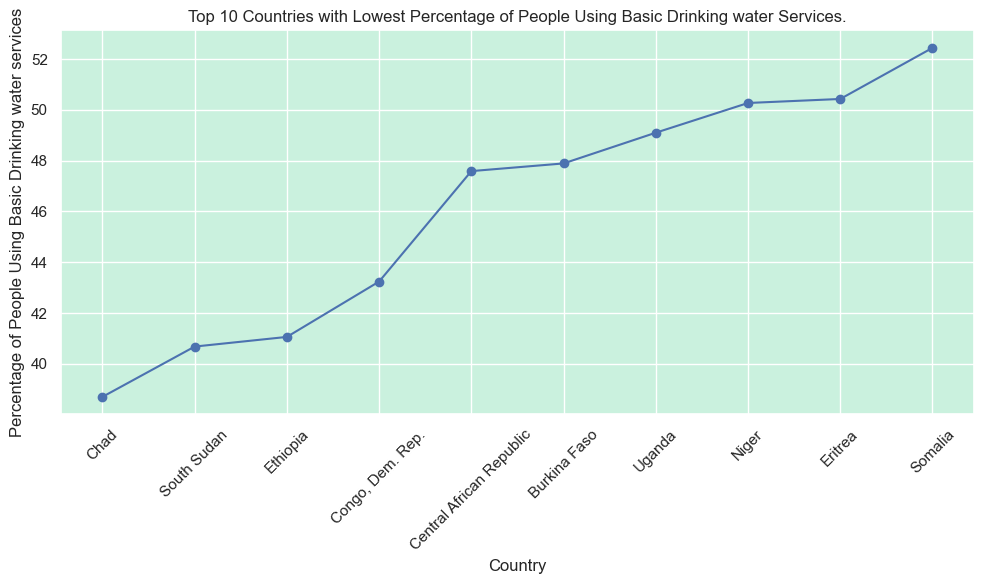

In [43]:
# Visualize the top 10 countries with inadequate drinking water services.
top_10 = sorted_drinking_water.head(10)

plt.figure(figsize=(10, 6))
plt.plot(top_10['Country Name'], top_10['People_using_basic_drinking_water(% Total)'], marker='o')

plt.title('Top 10 Countries with Lowest Percentage of People Using Basic Drinking water Services.')
plt.xlabel('Country')
plt.ylabel('Percentage of People Using Basic Drinking water services')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

**Identify countries with adequate infrastructure for healthcare and disease prevention.**

**Per rural population.**

In [44]:
sanitation_rural = year2017[['Country Name', 'People_using_basic_sanitaion(% Rural)']]
sorted_sanitation_rural = sanitation_rural.sort_values(by='People_using_basic_sanitaion(% Rural)', ascending=False)
sorted_sanitation_rural.head(15)

,Country Name,People_using_basic_sanitaion(% Rural)
33,Mauritius,95.18
15,"Egypt, Arab Rep.",91.13
0,Algeria,82.21
50,Tunisia,81.35
34,Morocco,78.99
45,South Africa,74.67
39,Rwanda,69.60
6,Cabo Verde,62.35
18,Eswatini,60.66
16,Equatorial Guinea,57.25


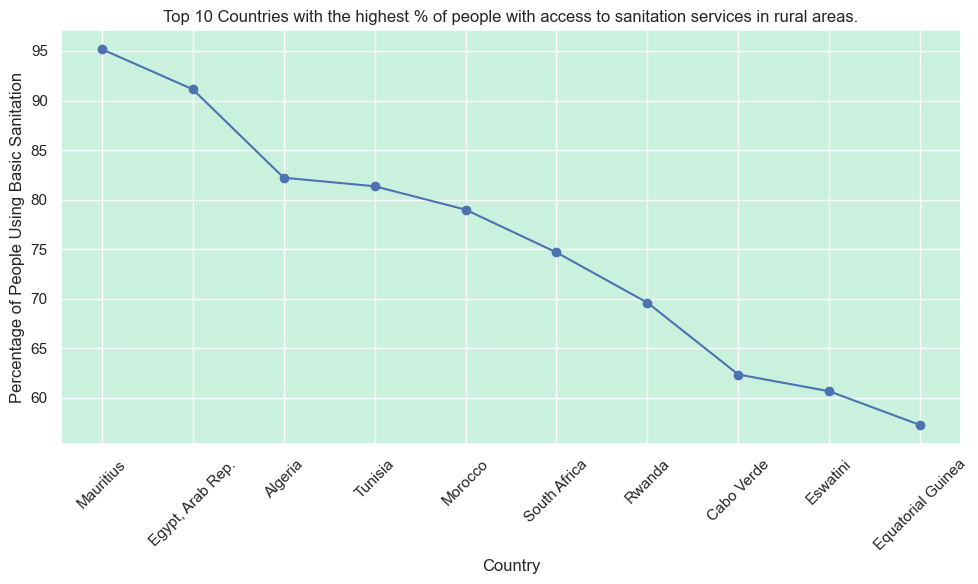

In [45]:
# Visualize the top 10 countries with easy access to sanitation facilities to people in rural areas.
top_10 = sorted_sanitation_rural.head(10)

plt.figure(figsize=(10, 6))
plt.plot(top_10['Country Name'], top_10['People_using_basic_sanitaion(% Rural)'], marker='o')

plt.title('Top 10 Countries with the highest % of people with access to sanitation services in rural areas.')
plt.xlabel('Country')
plt.ylabel('Percentage of People Using Basic Sanitation')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

In [46]:
water_rural = year2017[['Country Name', 'People_using_basic_drinking_water(% Rural)']]
sorted_water_rural = water_rural.sort_values(by='People_using_basic_drinking_water(% Rural)', ascending=False)
sorted_water_rural.head(15)

,Country Name,People_using_basic_drinking_water(% Rural)
33,Mauritius,99.83
15,"Egypt, Arab Rep.",98.82
50,Tunisia,88.71
0,Algeria,88.69
45,South Africa,80.68
40,Sao Tome and Principe,76.95
10,Comoros,76.91
6,Cabo Verde,75.78
3,Botswana,75.53
34,Morocco,70.73


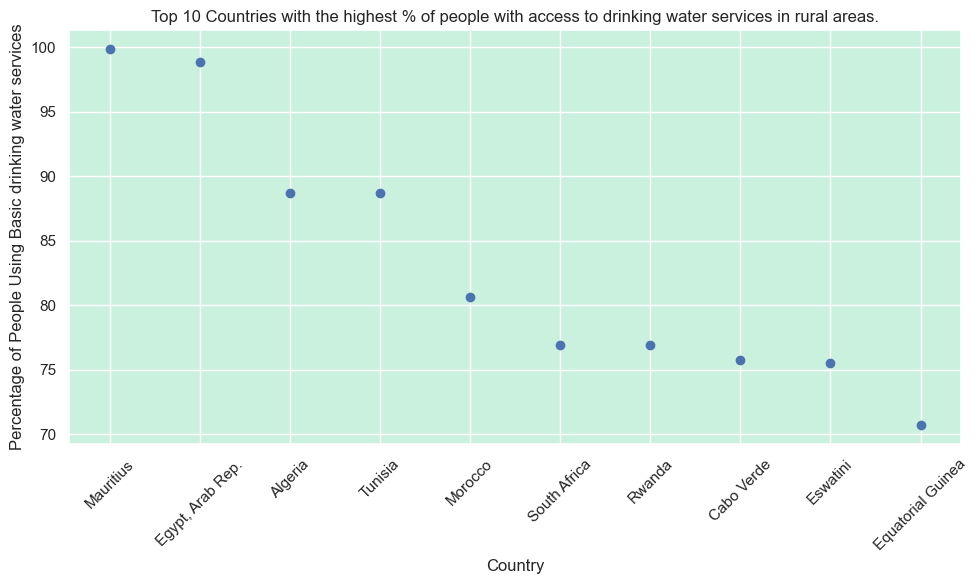

In [47]:
# Visualize the top 10 countries with easy access to drinking water services to people in rural areas.
top_10_water = sorted_water_rural.head(10)

plt.figure(figsize=(10, 6))
plt.plot(top_10['Country Name'], top_10_water['People_using_basic_drinking_water(% Rural)'], marker='o', linestyle='None')

plt.title('Top 10 Countries with the highest % of people with access to drinking water services in rural areas.')
plt.xlabel('Country')
plt.ylabel('Percentage of People Using Basic drinking water services')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

**Per urban population.**

In [48]:
sanitation_urban = year2017[['Country Name', 'People_using_basic_sanitation(% Urban)']]
sorted_sanitation_urban = sanitation_urban.sort_values(by='People_using_basic_sanitation(% Urban)', ascending=False)
sorted_sanitation_urban.head(15)

,Country Name,People_using_basic_sanitation(% Urban)
15,"Egypt, Arab Rep.",98.30
33,Mauritius,95.97
50,Tunisia,95.29
34,Morocco,94.36
0,Algeria,89.67
3,Botswana,89.42
6,Cabo Verde,79.98
14,Djibouti,76.32
45,South Africa,76.31
32,Mauritania,74.80


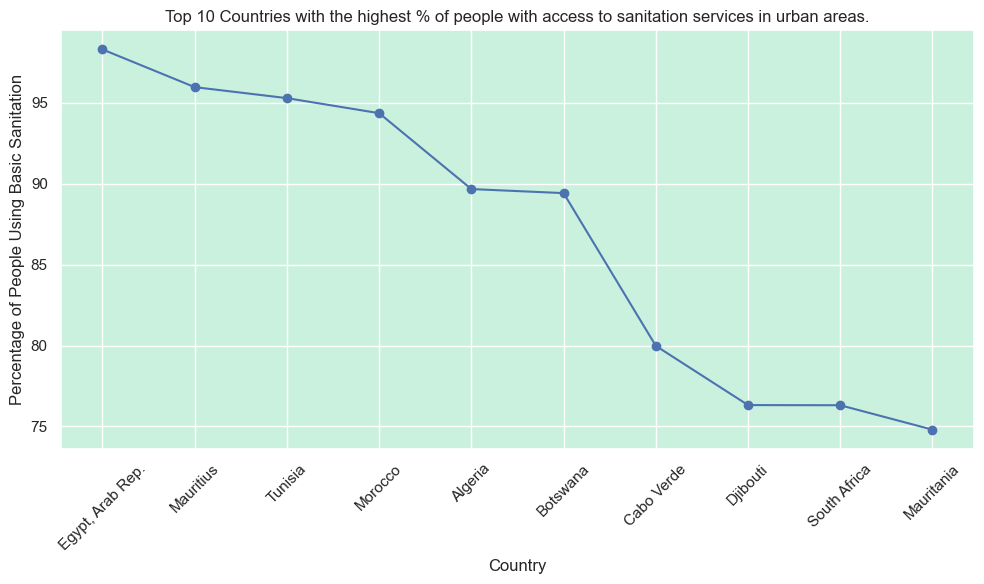

In [49]:
# Visualize the top 10 countries with easy access to sanitation facilities to people in urban areas.
urban_top_10 = sorted_sanitation_urban.head(10)

plt.figure(figsize=(10, 6))
plt.plot(urban_top_10['Country Name'], urban_top_10['People_using_basic_sanitation(% Urban)'], marker='o')

plt.title('Top 10 Countries with the highest % of people with access to sanitation services in urban areas.')
plt.xlabel('Country')
plt.ylabel('Percentage of People Using Basic Sanitation')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

In [50]:
water_urban = year2017[['Country Name', 'People_using_basic_drinking_water(% Urban)']]
sorted_water_urban = water_urban.sort_values(by='People_using_basic_drinking_water(% Urban)', ascending=False)
sorted_water_urban.head(15)

,Country Name,People_using_basic_drinking_water(% Urban)
33,Mauritius,99.92
50,Tunisia,99.70
15,"Egypt, Arab Rep.",99.49
45,South Africa,98.90
3,Botswana,97.09
18,Eswatini,96.78
34,Morocco,96.65
36,Namibia,96.41
0,Algeria,95.44
53,Zimbabwe,94.00


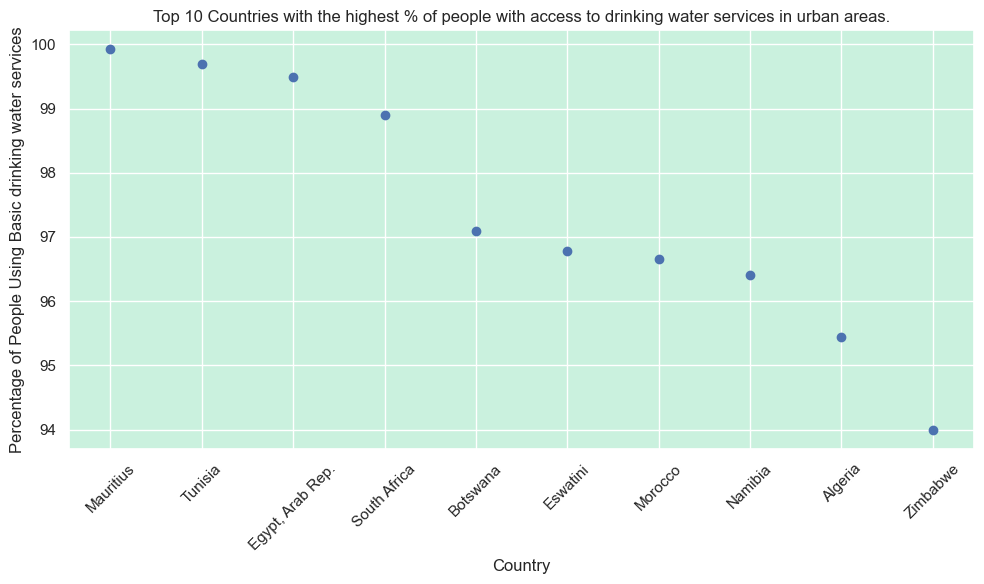

In [51]:
# Visualize the top 10 countries with easy access to drinking water services to people in urban areas.
urban_top_10_water = sorted_water_urban.head(10)

plt.figure(figsize=(10, 6))
plt.plot(urban_top_10_water['Country Name'], urban_top_10_water['People_using_basic_drinking_water(% Urban)'], marker='o', linestyle='None')

plt.title('Top 10 Countries with the highest % of people with access to drinking water services in urban areas.')
plt.xlabel('Country')
plt.ylabel('Percentage of People Using Basic drinking water services')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

***A LOOK INTO THE RURAL AND URBAN POPULATION.***

In [74]:
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Malaria_Incidence_per1000_at-risk', 'Malaria cases reported',
       'Use_of_treated_bed_nets(% under 5)',
       'Children_with_fever_receiving_antimalarial_drugs(% under 5)',
       'Preventive_treatmnet_in_pregnancy(% pregnant women)',
       'People_using_safely_managed_drinking_water(% Total)',
       'People_using_safely_managed_drinking_water(% Rural)',
       'People_using_safely_managed_drinking_water(% Urban)',
       'People_using_safely_managed_sanitation(% Total)',
       'People_using_safely_managed_sanitation(% Rural)',
       'People_using_safely_managed_sanitation(% Urban)',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People_using_basic_drinking_water(% Total)',
       'People_using_basic_drinking_water(% Rural)',
       'People_using_basic_drinking_water(% Urba

In [75]:
population = ['Rural population (% of total population)','Urban population (% of total population)','Country Name']
pop = df.loc[:,population]
pop = pop.groupby("Country Name",as_index=False).mean(numeric_only = True)

#pop.columns= {"Country_Name","Rural_population_(%_of_total_population)","Urban_population_(%_of_total_population)"}
pop

,Country Name,Rural population (% of total population),Urban population (% of total population)
0,Algeria,31.169091,68.830909
1,Angola,38.765455,61.234545
2,Benin,55.860909,44.140909
3,Botswana,35.902727,64.099091
4,Burkina Faso,74.191818,25.808182
5,Burundi,88.769091,11.231818
6,Cabo Verde,37.363636,62.636364
7,Cameroon,47.233636,52.766364
8,Central African Republic,60.503636,39.497273
9,Chad,77.769091,22.232727


C:\Users\toshiba\AppData\Local\Temp\ipykernel_6148\946384137.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
C:\Users\toshiba\AppData\Local\Temp\ipykernel_6148\946384137.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)


[Text(0, 0, 'Algeria'),
 Text(1, 0, 'Angola'),
 Text(2, 0, 'Benin'),
 Text(3, 0, 'Botswana'),
 Text(4, 0, 'Burkina Faso'),
 Text(5, 0, 'Burundi'),
 Text(6, 0, 'Cabo Verde'),
 Text(7, 0, 'Cameroon'),
 Text(8, 0, 'Central African Republic'),
 Text(9, 0, 'Chad'),
 Text(10, 0, 'Comoros'),
 Text(11, 0, 'Congo, Dem. Rep.'),
 Text(12, 0, 'Congo, Rep.'),
 Text(13, 0, "Cote d'Ivoire"),
 Text(14, 0, 'Djibouti'),
 Text(15, 0, 'Egypt, Arab Rep.'),
 Text(16, 0, 'Equatorial Guinea'),
 Text(17, 0, 'Eritrea'),
 Text(18, 0, 'Eswatini'),
 Text(19, 0, 'Ethiopia'),
 Text(20, 0, 'Gabon'),
 Text(21, 0, 'Gambia'),
 Text(22, 0, 'Ghana'),
 Text(23, 0, 'Guinea'),
 Text(24, 0, 'Guinea-Bissau'),
 Text(25, 0, 'Kenya'),
 Text(26, 0, 'Lesotho'),
 Text(27, 0, 'Liberia'),
 Text(28, 0, 'Libya'),
 Text(29, 0, 'Madagascar'),
 Text(30, 0, 'Malawi'),
 Text(31, 0, 'Mali'),
 Text(32, 0, 'Mauritania'),
 Text(33, 0, 'Mauritius'),
 Text(34, 0, 'Morocco'),
 Text(35, 0, 'Mozambique'),
 Text(36, 0, 'Namibia'),
 Text(37, 0, 'Niger'

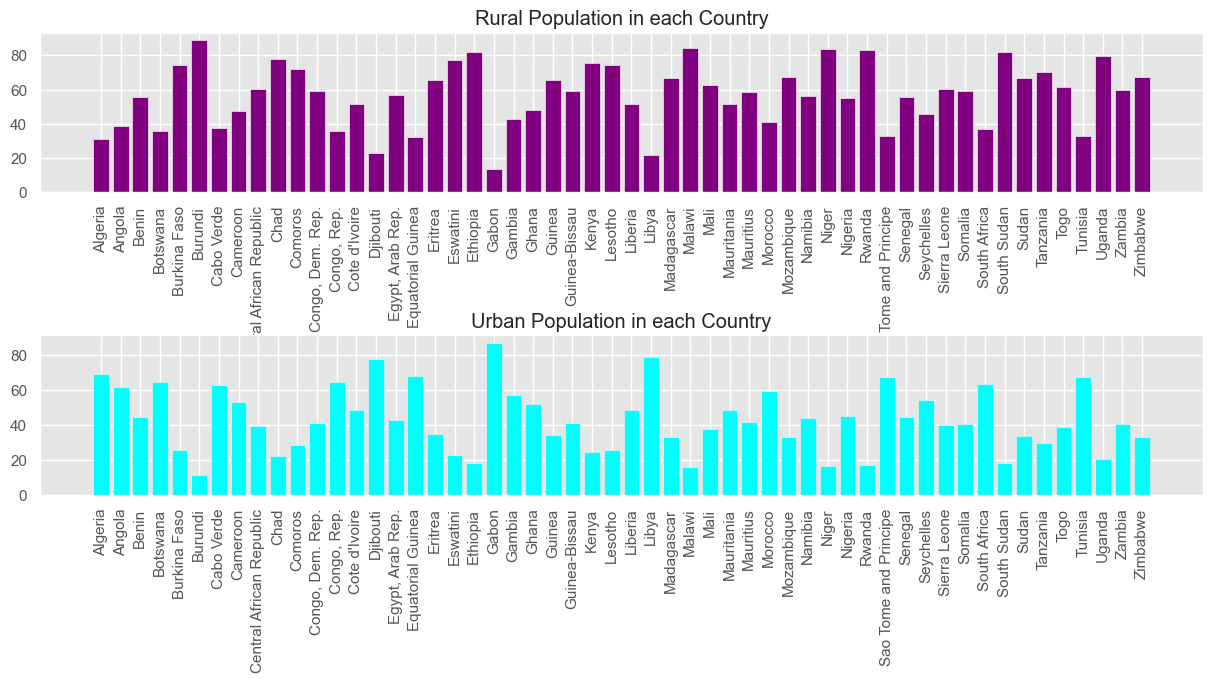

In [76]:
plt.style.use('ggplot')
fig,(ax1,ax2) = plt.subplots(nrows=2 ,ncols =1,figsize=(15,6))

plt.subplots_adjust(hspace=.9)
ax1.bar(pop['Country Name'],pop['Rural population (% of total population)'],color = 'purple')
ax1.set_title('Rural Population in each Country')
ax2.bar(pop['Country Name'],pop['Urban population (% of total population)'], color = 'cyan')
ax2.set_title('Urban Population in each Country')

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

**Analyzing the distribution of rural and urban population and seeing its relationship with malaria cases reported.**

In [52]:
population = year2017[['Country Name','Rural population (% of total population)', 'Urban population (% of total population)', 'Malaria cases reported']]
population.head(15)

,Country Name,Rural population (% of total population),Urban population (% of total population),Malaria cases reported
0,Algeria,27.95,72.05,0
1,Angola,35.16,64.84,3874892
2,Benin,53.23,46.77,1774022
3,Botswana,31.30,68.70,1900
4,Burkina Faso,71.26,28.74,10255415
5,Burundi,87.29,12.71,8453810
6,Cabo Verde,34.74,65.26,423
7,Cameroon,44.22,55.78,1317371
8,Central African Republic,59.02,40.98,383309
9,Chad,77.14,22.86,1962372


In [53]:
"""
# Filtering the columns above is to see whether the population in rural and urban areas has an effect on the malaria cases reported.
It is evident that countries with higher percentages of people in the rural areas end up reporting higher cases. This may be afflicted 
to inability to purchase well treated mosquito nets, living in areas with stagnant water nearby ( where mosquitoes breed from ) and many other factors.
"""

'\n# Filtering the columns above is to see whether the population in rural and urban areas has an effect on the malaria cases reported.\nIt is evident that countries with higher percentages of people in the rural areas end up reporting higher cases. This may be afflicted \nto inability to purchase well treated mosquito nets, living in areas with stagnant water nearby ( where mosquitoes breed from ) and many other factors.\n'

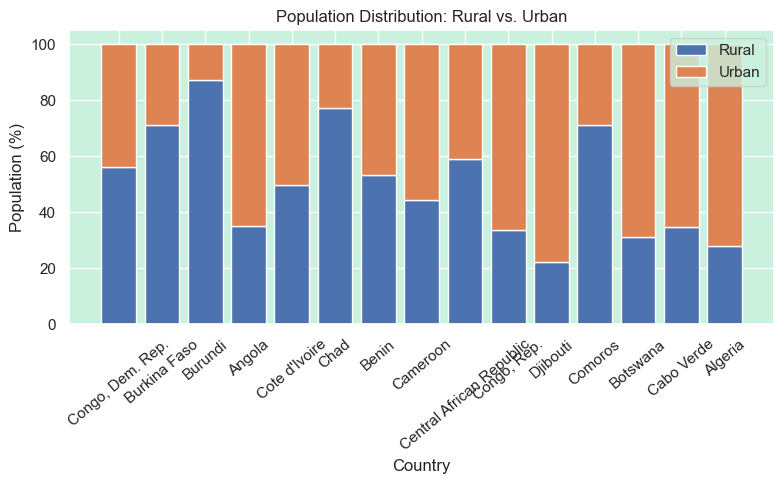

In [54]:
chart = year2017.head(15).sort_values(by='Malaria cases reported', ascending=False)  # Countries with higher cases will be on top

fig, ax = plt.subplots(figsize=(8, 5))
# Stacked bar chart
ax.bar(chart['Country Name'], chart['Rural population (% of total population)'], label='Rural')
ax.bar(chart['Country Name'], chart['Urban population (% of total population)'], bottom=chart['Rural population (% of total population)'], label='Urban')

ax.set_ylabel('Population (%)')
ax.set_xlabel('Country')
ax.set_title('Population Distribution: Rural vs. Urban')
ax.legend()

plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

**Visualizing the relationship between population and malaria cases reported.**

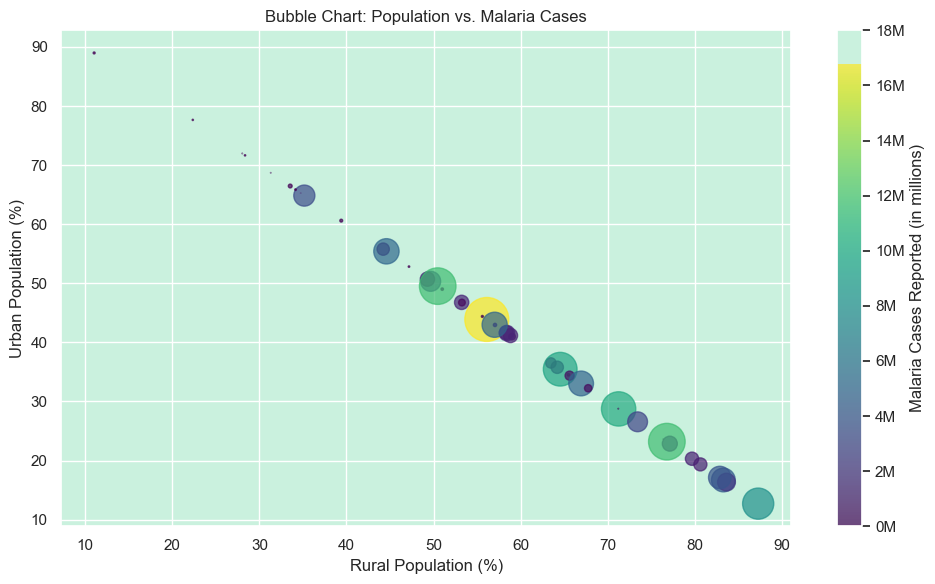

In [55]:
import matplotlib.ticker as mticker

# Create a copy of the DataFrame
year2017_copy = year2017.copy()

# Normalize the data for bubble size
max_malaria_cases = year2017_copy['Malaria cases reported'].max()
year2017_copy['Normalized Malaria Cases'] = year2017_copy['Malaria cases reported'] / max_malaria_cases

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bubble chart
scatter = ax.scatter(year2017_copy['Rural population (% of total population)'],
                     year2017_copy['Urban population (% of total population)'],
                     s=year2017_copy['Normalized Malaria Cases'] * 1000,
                     c=year2017_copy['Malaria cases reported'],
                     cmap='viridis',
                     alpha=0.7)

ax.set_xlabel('Rural Population (%)')
ax.set_ylabel('Urban Population (%)')
ax.set_title('Bubble Chart: Population vs. Malaria Cases')
ax.grid(True)

# Add a colorbar
colorbar = plt.colorbar(scatter)

# Get the current tick locations and labels
ticks_loc = colorbar.get_ticks()
ticks_labels = [f'{int(label/1e6):,}M' for label in ticks_loc]
year2017_copy['Normalized Malaria Cases'] = year2017_copy['Malaria cases reported'] / max_malaria_cases

colorbar.set_ticks(ticks_loc)
colorbar.set_ticklabels(ticks_labels)

colorbar.set_label('Malaria Cases Reported (in millions)')
plt.tight_layout()
plt.show()

**Geographical Distribution of Malaria Incidence.**

In [56]:
import geopandas as gpd
import folium

# Convert latitude and longitude to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, 
                        geometry=gpd.points_from_xy(df.longitude, df.latitude), 
                        crs='EPSG:4326')

# Create a Folium map centered around Africa
map_center = [0, 25]  # Approximate center of Africa's latitude and longitude
malaria_map = folium.Map(location=map_center, zoom_start=3)

# Add markers to the map for each location with malaria incidence
for idx, row in gdf.iterrows():
    popup_text = f"Country: {row['Country Name']}<br>" \
                 f"Year: {row['Year']}<br>" \
                 f"Malaria Incidence): {row['Malaria_Incidence_per1000_at-risk']}"
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text,
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(malaria_map)

# Display the map
malaria_map

ModuleNotFoundError: No module named 'geopandas'

**Analysis of Treated Bed Net Usage for Children Under 5.**

In [65]:
# Filter out % of children using treated bed nets per country in 2017.
nets2017 = year2017[year2017['Use_of_treated_bed_nets(% under 5)'] != 0][['Country Name', 'Use_of_treated_bed_nets(% under 5)']]
nets2017

,Country Name,Use_of_treated_bed_nets(% under 5)
5,Burundi,39.9
21,Gambia,62.4
30,Malawi,67.5
38,Nigeria,49.1
39,Rwanda,68.0
41,Senegal,60.7
43,Sierra Leone,59.5
48,Tanzania,54.6
49,Togo,69.7


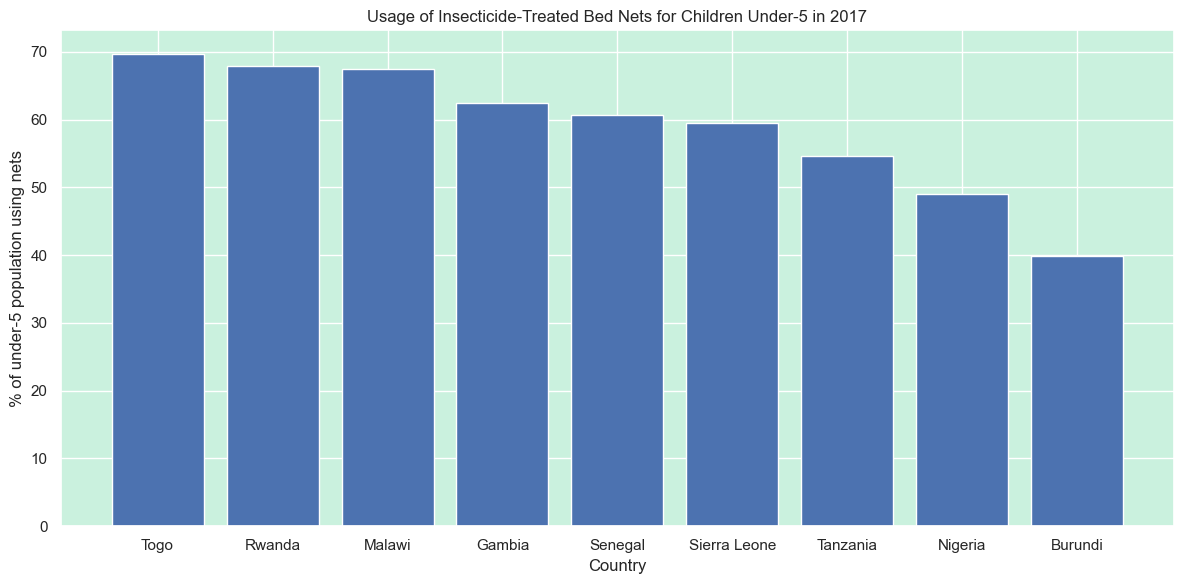

In [66]:
nets_sort = nets2017.sort_values(by='Use_of_treated_bed_nets(% under 5)', ascending=False)
plt.figure(figsize=(12, 6)) 
plt.bar(nets_sort['Country Name'], nets_sort['Use_of_treated_bed_nets(% under 5)'])
plt.xticks(rotation=0)  

plt.xlabel('Country')
plt.ylabel('% of under-5 population using nets')
plt.title('Usage of Insecticide-Treated Bed Nets for Children Under-5 in 2017')
plt.tight_layout()

plt.show()

In [67]:
# Filter out % of children using treated bed nets per country in 2016.
nets2016 = year2016[year2016['Use_of_treated_bed_nets(% under 5)'] != 0][['Country Name', 'Use_of_treated_bed_nets(% under 5)']]
nets2016

,Country Name,Use_of_treated_bed_nets(% under 5)
1,Angola,21.7
13,Cote d'Ivoire,59.7
22,Ghana,52.2
23,Guinea,67.9
27,Liberia,43.7
29,Madagascar,73.4
30,Malawi,42.7
41,Senegal,66.6
43,Sierra Leone,44.1
48,Tanzania,54.4


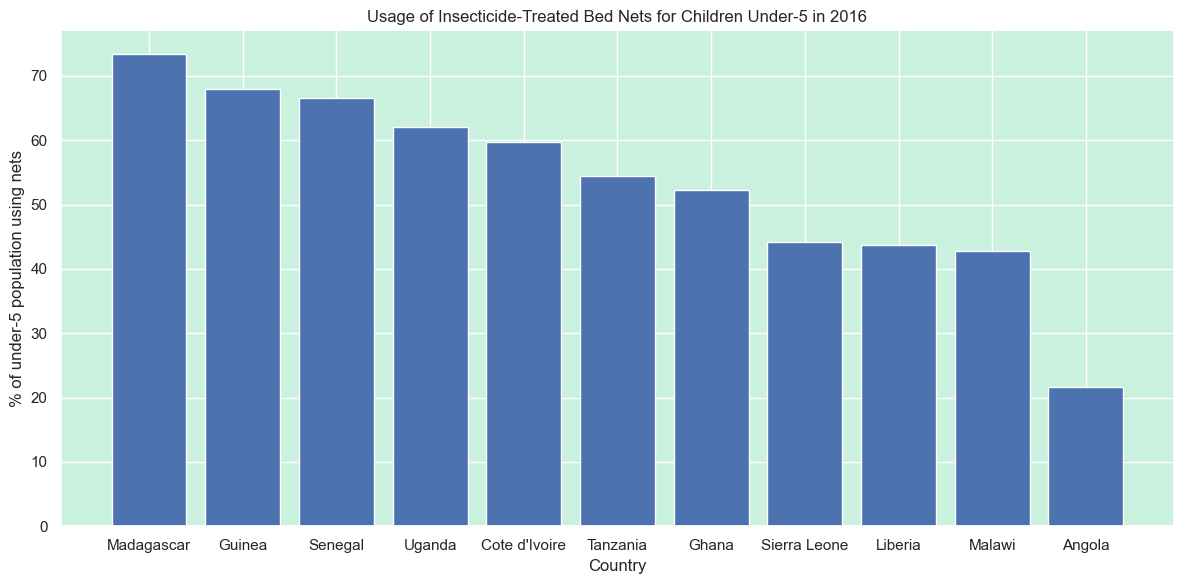

In [ ]:
nets2016_sort = nets2016.sort_values(by='Use_of_treated_bed_nets(% under 5)', ascending=False)
plt.figure(figsize=(12, 6)) 
plt.bar(nets2016_sort['Country Name'], nets2016_sort['Use_of_treated_bed_nets(% under 5)'])
plt.xticks(rotation=0)  

plt.xlabel('Country')
plt.ylabel('% of under-5 population using nets')
plt.title('Usage of Insecticide-Treated Bed Nets for Children Under-5 in 2016')
plt.tight_layout()

plt.show()

In [70]:
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Malaria_Incidence_per1000_at-risk', 'Malaria cases reported',
       'Use_of_treated_bed_nets(% under 5)',
       'Children_with_fever_receiving_antimalarial_drugs(% under 5)',
       'Preventive_treatmnet_in_pregnancy(% pregnant women)',
       'People_using_safely_managed_drinking_water(% Total)',
       'People_using_safely_managed_drinking_water(% Rural)',
       'People_using_safely_managed_drinking_water(% Urban)',
       'People_using_safely_managed_sanitation(% Total)',
       'People_using_safely_managed_sanitation(% Rural)',
       'People_using_safely_managed_sanitation(% Urban)',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People_using_basic_drinking_water(% Total)',
       'People_using_basic_drinking_water(% Rural)',
       'People_using_basic_drinking_water(% Urba

In [71]:
pie = df.loc[:,['Year','Malaria_Incidence_per1000_at-risk']]
pie=pie.groupby('Year').mean(numeric_only= True)
pie

,Malaria_Incidence_per1000_at-risk
Year,
2007,194.599815
2008,189.123889
2009,187.769444
2010,184.330370
2011,177.466296
2012,175.190185
2013,171.409444
2014,163.646667
2015,163.650185


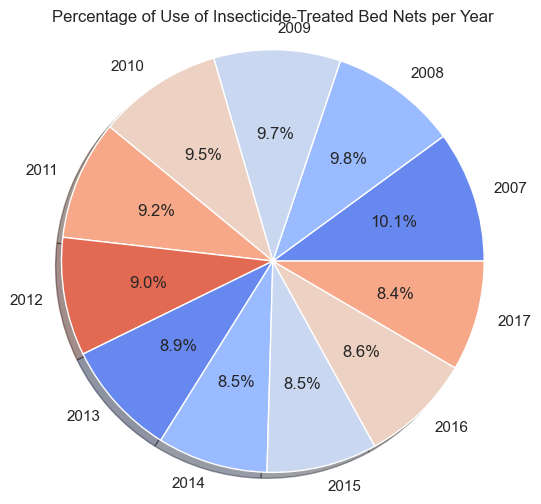

In [72]:
# Group by 'Year' and calculate the mean of 'Use_of_insecticide-treated_bed_nets_(%_of_under-5_population)'
pie = df.groupby('Year').mean(numeric_only=True)

# Set the colors using Seaborn color palette
colors = sns.color_palette("coolwarm")

# Plot the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size (width, height)
plt.pie(pie['Malaria_Incidence_per1000_at-risk'], labels=pie.index,
        shadow=True, autopct="%1.1f%%", colors=colors)
plt.title("Percentage of Use of Insecticide-Treated Bed Nets per Year")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()

In [73]:
""" 
Analysis shows that there was a decrease in usage of insecticide treated bed nets in 2017 as was in 2016. 
This could have been the spark of the higher malaria cases in 2017.
""" 

' \nAnalysis shows that there was a decrease in usage of insecticide treated bed nets in 2017 as was in 2016. \nThis could have been the spark of the higher malaria cases in 2017.\n'

**Evaluation of Antimalarial Drug Administration for Children Under 5.**

In [ ]:
# Filter out % of children under-5 with fever receiving anti-malarial drugs per country in 2017.
drugs = year2017[year2017['Children_with_fever_receiving_antimalarial_drugs(% under 5)'] != 0][['Country Name', 'Children_with_fever_receiving_antimalarial_drugs(% under 5)']]
drugs

,Country Name,Children_with_fever_receiving_antimalarial_drugs(% under 5)
5,Burundi,47.0
30,Malawi,29.4
39,Rwanda,19.6
41,Senegal,4.7
48,Tanzania,36.2
49,Togo,31.1


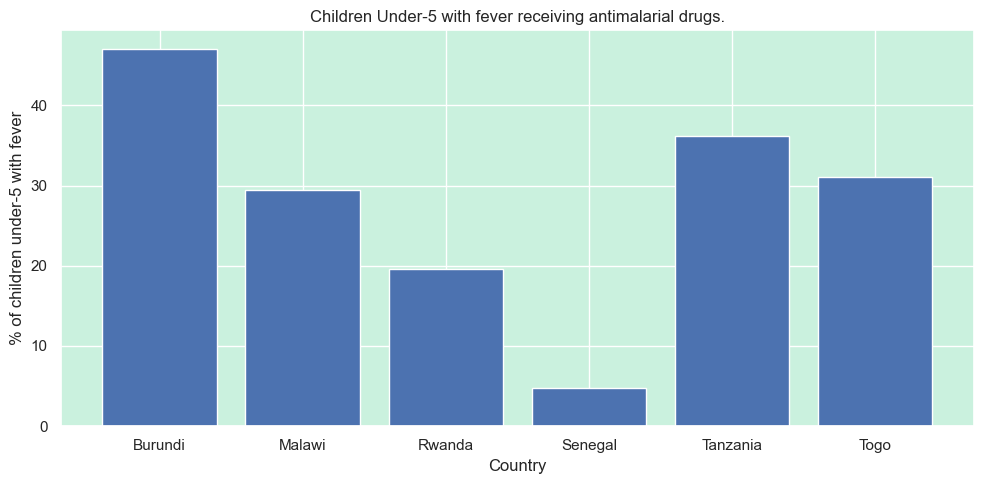

In [ ]:
plt.figure(figsize=(10, 5)) 
plt.bar(drugs['Country Name'], drugs['Children_with_fever_receiving_antimalarial_drugs(% under 5)'])
plt.xticks(rotation=0)  

plt.xlabel('Country')
plt.ylabel('% of children receiving drugs.')
plt.title('Children Under-5 with fever receiving antimalarial drugs in 2017.')
plt.tight_layout()

plt.show()

In [ ]:
# Filter out % of children under-5 with fever receiving anti-malarial drugs per country in 2016.
drugs = year2016[year2016['Children_with_fever_receiving_antimalarial_drugs(% under 5)'] != 0][['Country Name', 'Children_with_fever_receiving_antimalarial_drugs(% under 5)']]
drugs

,Country Name,Children_with_fever_receiving_antimalarial_drugs(% under 5)
1,Angola,18.1
19,Ethiopia,7.7
22,Ghana,50.1
27,Liberia,65.5
29,Madagascar,10.1
30,Malawi,37.6
41,Senegal,1.7
43,Sierra Leone,57.0
45,South Africa,0.5
48,Tanzania,51.1


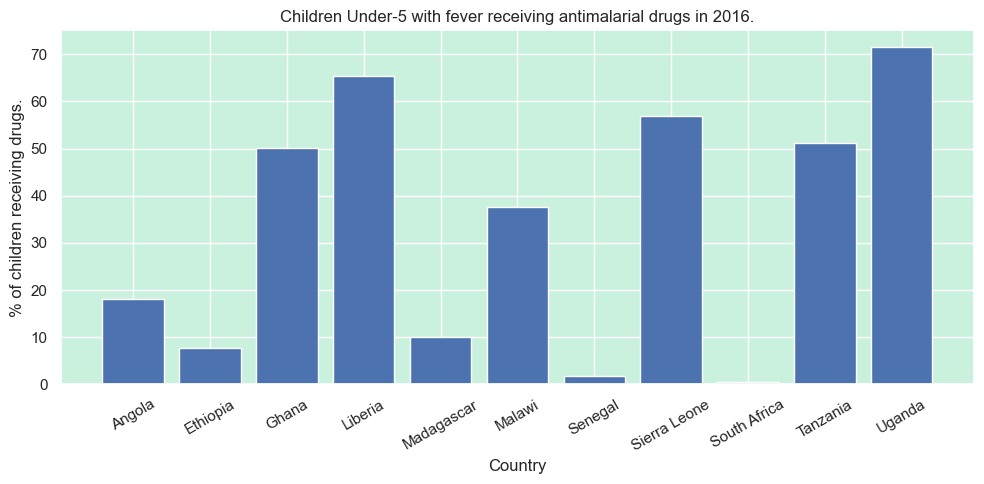

In [ ]:
plt.figure(figsize=(10, 5)) 
plt.bar(drugs['Country Name'], drugs['Children_with_fever_receiving_antimalarial_drugs(% under 5)'])
plt.xticks(rotation=30)  

plt.xlabel('Country')
plt.ylabel('% of children receiving drugs.')
plt.title('Children Under-5 with fever receiving antimalarial drugs in 2016.')
plt.tight_layout()

plt.show()

In [ ]:
""" 
Analysis shows that administration of anti-malarial drugs in 2017 is a bit lower than that in 2016.
This explains why malaria cases in 2017 were higher, children with malaria spreaded the disease to other children since they were not being treated. 
""" 